In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder


In [5]:
#Load the dataset
df=pd.read_csv("//content//adult_with_headers.csv")
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [6]:
# Display the first few rows of the dataset
print(df.head())

   age          workclass  fnlwgt   education  education_num  \
0   39          State-gov   77516   Bachelors             13   
1   50   Self-emp-not-inc   83311   Bachelors             13   
2   38            Private  215646     HS-grad              9   
3   53            Private  234721        11th              7   
4   28            Private  338409   Bachelors             13   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0          2174             0              40   United-States   <=50

In [7]:
#getting top 5 rows
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [8]:
#getting last 5 rows
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [9]:
#Getting information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
# Summary statistics for numerical columns
print(df.describe())


                age        fnlwgt  education_num  capital_gain  capital_loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hours_per_week  
count    32561.000000  
mean        40.437456  
std         12.347429  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [11]:
# Check the data types of each column
print(df.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object


In [12]:
# Check for missing values in each column
print(df.isnull().sum())

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64


In [13]:
# Returns a boolean Series showing which rows are duplicates
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
32556,False
32557,False
32558,False
32559,False


In [14]:
df[df.duplicated()]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
4881,25,Private,308144,Bachelors,13,Never-married,Craft-repair,Not-in-family,White,Male,0,0,40,Mexico,<=50K
5104,90,Private,52386,Some-college,10,Never-married,Other-service,Not-in-family,Asian-Pac-Islander,Male,0,0,35,United-States,<=50K
9171,21,Private,250051,Some-college,10,Never-married,Prof-specialty,Own-child,White,Female,0,0,10,United-States,<=50K
11631,20,Private,107658,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,10,United-States,<=50K
13084,25,Private,195994,1st-4th,2,Never-married,Priv-house-serv,Not-in-family,White,Female,0,0,40,Guatemala,<=50K
15059,21,Private,243368,Preschool,1,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,50,Mexico,<=50K
17040,46,Private,173243,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K
18555,30,Private,144593,HS-grad,9,Never-married,Other-service,Not-in-family,Black,Male,0,0,40,?,<=50K
18698,19,Private,97261,HS-grad,9,Never-married,Farming-fishing,Not-in-family,White,Male,0,0,40,United-States,<=50K
21318,19,Private,138153,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,10,United-States,<=50K


In [15]:
#Count of duplicated rows
df[df.duplicated()].shape[0]

24

In [16]:
# Find duplicated rows (excluding the first occurrence)
dup_rows = df[df.duplicated()]

# Print them
print("Duplicated rows:")
print(dup_rows)

Duplicated rows:
       age          workclass  fnlwgt      education  education_num  \
4881    25            Private  308144      Bachelors             13   
5104    90            Private   52386   Some-college             10   
9171    21            Private  250051   Some-college             10   
11631   20            Private  107658   Some-college             10   
13084   25            Private  195994        1st-4th              2   
15059   21            Private  243368      Preschool              1   
17040   46            Private  173243        HS-grad              9   
18555   30            Private  144593        HS-grad              9   
18698   19            Private   97261        HS-grad              9   
21318   19            Private  138153   Some-college             10   
21490   19            Private  146679   Some-college             10   
21875   49            Private   31267        7th-8th              4   
22300   25            Private  195994        1st-4th        

In [17]:
df.columns[df.columns.duplicated()]   #to check duplicated columns

Index([], dtype='object')

In [18]:
# Find duplicated columns
dup_cols = df.columns[df.T.duplicated()]

# Print them
print("Duplicated columns:", list(dup_cols))

Duplicated columns: []


In [19]:
df=df.drop_duplicates()
#data.drop_duplicates(inplace=True)|

In [17]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [20]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Rename the columns**

In [21]:
df.rename({"level_0":"Level"},inplace=True,axis=1)

In [22]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## **Statistical Summary**

In [23]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [24]:
# Drop index column if it exists
if 'index' in df.columns:
    df = df.drop(columns='index')


In [25]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [26]:
df.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [27]:
#Changes does not effect the "data" dataframe
df1=df.copy()

In [28]:
df1.dtypes

,0
age,int64
workclass,object
fnlwgt,int64
education,object
education_num,int64
marital_status,object
occupation,object
relationship,object
race,object
sex,object


In [29]:
# Initialize the label encoder
label_encoder = LabelEncoder()

# Apply label encoding to categorical columns
encoded_df1 = df1.apply(label_encoder.fit_transform)

print(encoded_df1)

       age  workclass  fnlwgt  education  education_num  marital_status  \
0       22          7    2671          9             12               4   
1       33          6    2926          9             12               2   
2       21          4   14086         11              8               0   
3       36          4   15336          1              6               2   
4       11          4   19355          9             12               2   
...    ...        ...     ...        ...            ...             ...   
32556   10          4   16528          7             11               2   
32557   23          4    8080         11              8               2   
32558   41          4    7883         11              8               6   
32559    5          4   12881         11              8               4   
32560   35          5   17825         11              8               2   

       occupation  relationship  race  sex  capital_gain  capital_loss  \
0               1        

**Statistical Summary**

In [30]:
# Ensure only numeric columns are used for calculations
numeric_columns = df1.select_dtypes(include='number')

# Mean of numeric columns
mean_values = numeric_columns.mean()
print("Mean values:\n", mean_values)

# Median of numeric columns
median_values = numeric_columns.median()
print("\nMedian values:\n", median_values)

# Mode for each numeric column
mode_values = numeric_columns.mode().iloc[0]  # Use .iloc[0] to get the first mode
print("Mode values:\n", mode_values)

# Standard Deviation of numeric columns
std_values = numeric_columns.std()
print("\nStandard Deviation:\n", std_values)

# Variance of numeric columns
variance_values = numeric_columns.var()
print("\nVariance values:\n", variance_values)

# Interquartile Range (IQR) for numeric columns
Q1 = numeric_columns.quantile(0.25)
Q3 = numeric_columns.quantile(0.75)
iqr_values = Q3 - Q1
print("\nInterquartile Range (IQR):\n", iqr_values)

# Skewness for numeric columns
skewness_values = numeric_columns.skew()
print("Skewness:\n", skewness_values)

# Kurtosis for numeric columns
kurtosis_values = numeric_columns.kurtosis()
print("\nKurtosis:\n", kurtosis_values)


Mean values:
 age                   38.585549
fnlwgt            189780.848511
education_num         10.081815
capital_gain        1078.443741
capital_loss          87.368227
hours_per_week        40.440329
dtype: float64

Median values:
 age                   37.0
fnlwgt            178356.0
education_num         10.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
dtype: float64
Mode values:
 age                   36.0
fnlwgt            123011.0
education_num          9.0
capital_gain           0.0
capital_loss           0.0
hours_per_week        40.0
Name: 0, dtype: float64

Standard Deviation:
 age                   13.637984
fnlwgt            105556.471009
education_num          2.571633
capital_gain        7387.957424
capital_loss         403.101833
hours_per_week        12.346889
dtype: float64

Variance values:
 age               1.859946e+02
fnlwgt            1.114217e+10
education_num     6.613296e+00
capital_gain      5.458191e+07
capital_loss 

**Missig Values**

In [31]:
df1.isnull().sum()

,0
age,0
workclass,0
fnlwgt,0
education,0
education_num,0
marital_status,0
occupation,0
relationship,0
race,0
sex,0


**Visualizing Missing Values**

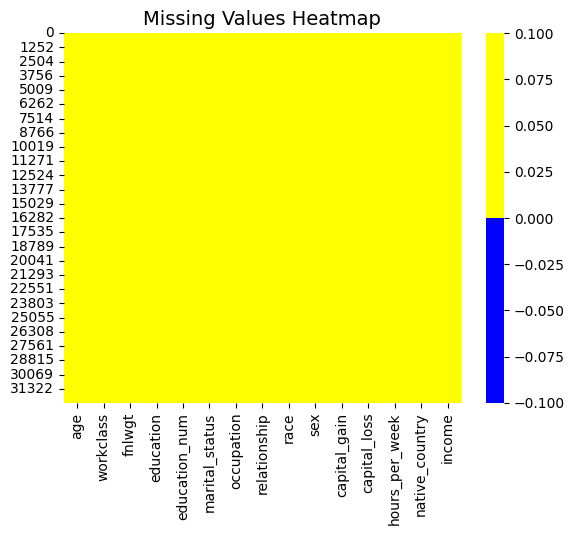

In [32]:
import seaborn as sns
cols = df.columns
colours = ['blue', 'yellow']#specify the colours - yellow is missing. blue is not missing.
sns.heatmap(df[cols].isnull(),
            cmap=colours)
plt.title("Missing Values Heatmap", fontsize=14)
plt.show()


**Detecting Outliers**

In [33]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

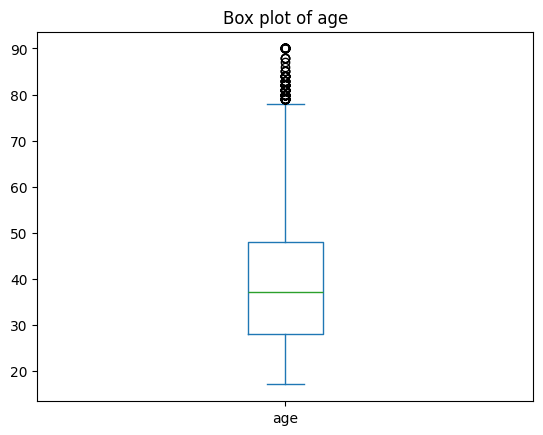

Skipping workclass for box plot as it contains no valid numeric data.
Skipping histogram for workclass as it contains no valid data.


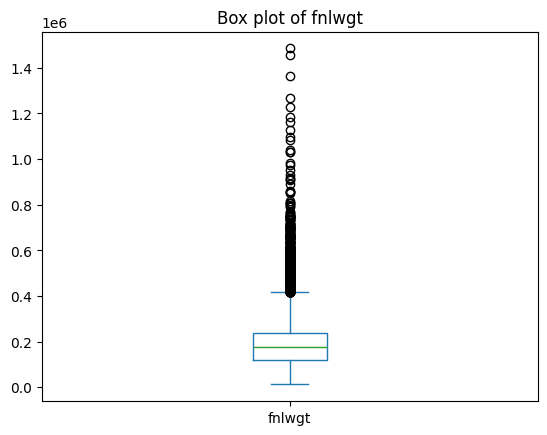

Skipping education for box plot as it contains no valid numeric data.
Skipping histogram for education as it contains no valid data.


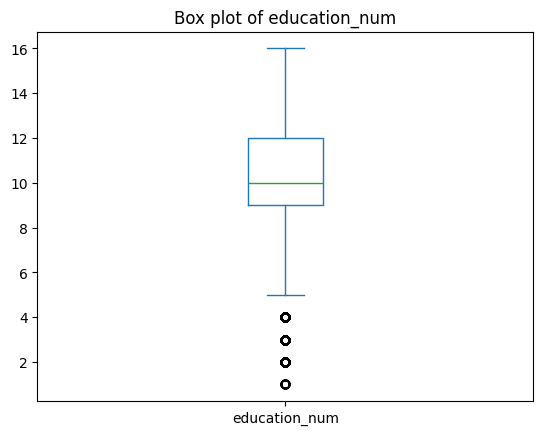

Skipping marital_status for box plot as it contains no valid numeric data.
Skipping histogram for marital_status as it contains no valid data.
Skipping occupation for box plot as it contains no valid numeric data.
Skipping histogram for occupation as it contains no valid data.
Skipping relationship for box plot as it contains no valid numeric data.
Skipping histogram for relationship as it contains no valid data.
Skipping race for box plot as it contains no valid numeric data.
Skipping histogram for race as it contains no valid data.
Skipping sex for box plot as it contains no valid numeric data.
Skipping histogram for sex as it contains no valid data.


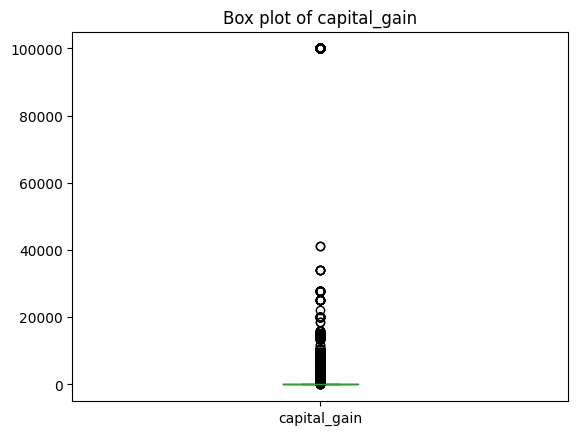

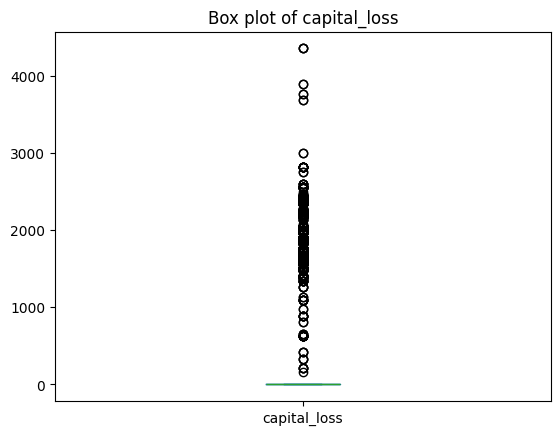

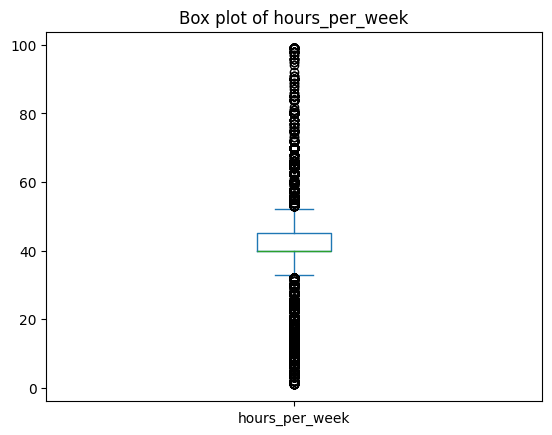

Skipping native_country for box plot as it contains no valid numeric data.
Skipping histogram for native_country as it contains no valid data.
Skipping income for box plot as it contains no valid numeric data.
Skipping histogram for income as it contains no valid data.


In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# List of columns to plot
cols = [ 'age', 'workclass', 'fnlwgt', 'education', 'education_num',
        'marital_status', 'occupation', 'relationship', 'race', 'sex',
        'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

# Loop through each column and plot either a box plot (for numeric) or histogram (for categorical)
for col in cols:
    try:
        # Attempt to convert the column to numeric
        df[col] = pd.to_numeric(df[col], errors='coerce')

        # If the column is numeric, check if it contains any non-null values
        if df[col].notna().sum() > 0:
            # Plot box plot for numeric columns
            df[col].plot(kind='box')
            plt.title(f'Box plot of {col}')
            plt.show()
        else:
            # If the column has no valid numeric data, handle it as categorical
            print(f"Skipping {col} for box plot as it contains no valid numeric data.")
            # Check if value_counts() has any data before plotting the histogram
            if df[col].notna().sum() > 0:
                df[col].value_counts().plot(kind='bar')
                plt.title(f'Histogram of {col}')
                plt.show()
            else:
                print(f"Skipping histogram for {col} as it contains no valid data.")

    except Exception as e:
        # If the conversion fails (likely a categorical column), plot a histogram
        print(f"Could not plot box plot for {col}. Plotting histogram instead.")
        # Check if value_counts() has any data before plotting the histogram
        if df[col].notna().sum() > 0:
            df[col].value_counts().plot(kind='bar')
            plt.title(f'Histogram of {col}')
            plt.show()
        else:
            print(f"Skipping histogram for {col} as it contains no valid data.")


In [35]:
# Function to cap outliers using IQR method (only on numeric columns, using df directly)
def cap_outliers_iqr(data):
    capped_data = data.copy()
    numeric_cols = capped_data.select_dtypes(include=['number']).columns  # Only numeric columns
    for col in numeric_cols:
        Q1 = capped_data[col].quantile(0.25)
        Q3 = capped_data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the outliers
        capped_data[col] = capped_data[col].apply(
            lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x
        )
    return capped_data

# Apply outlier treatment to the full original DataFrame
df1_treated = cap_outliers_iqr(df)
df1_treated

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39.0,NaN,77516.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
1,50.0,NaN,83311.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,32.5,NaN,NaN
2,38.0,NaN,215646.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
3,53.0,NaN,234721.0,NaN,7.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
4,28.0,NaN,338409.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27.0,NaN,257302.0,NaN,12.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,38.0,NaN,NaN
32557,40.0,NaN,154374.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
32558,58.0,NaN,151910.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,40.0,NaN,NaN
32559,22.0,NaN,201490.0,NaN,9.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,32.5,NaN,NaN


**Data Visualization**

In [36]:
#install and then import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew

In [37]:
# Identify all numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()

**Histograms for Numerical Variables**

<Figure size 1400x1000 with 0 Axes>

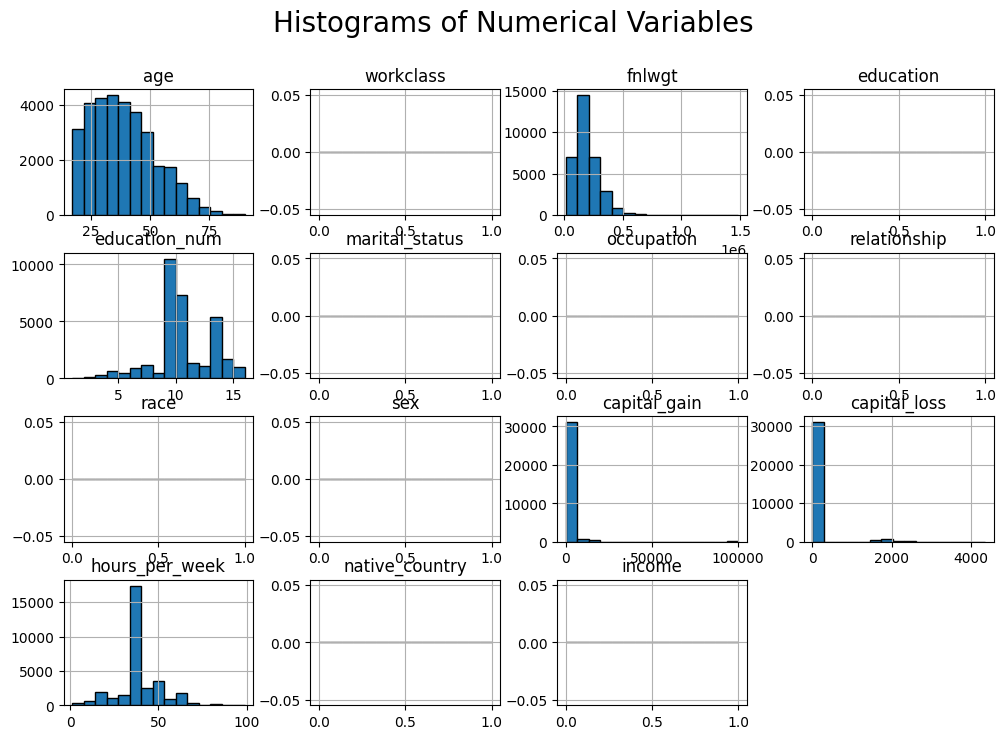

In [38]:
#Visualizing numerical columns in histogram with 10 bins and colours filled in it.
plt.figure(figsize=(14,10))
df.hist(figsize=(12, 8), bins=15, edgecolor="black")
plt.suptitle("Histograms of Numerical Variables", fontsize=20)
plt.show()

**Boxplots for Numerical Variables**

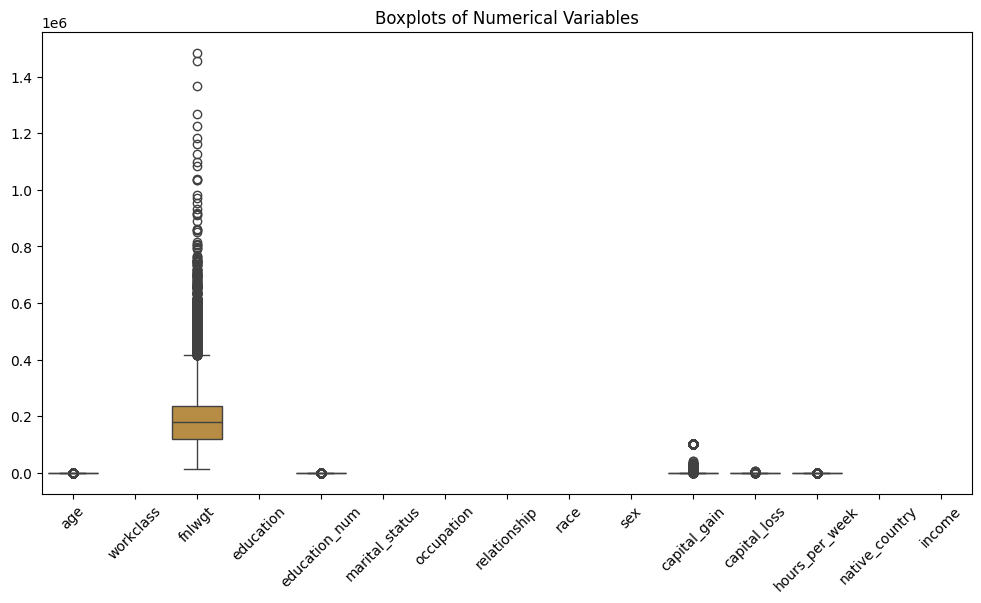

In [39]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df)
plt.xticks(rotation=45)  # Rotate labels for better readability
plt.title("Boxplots of Numerical Variables")
plt.show()

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns


In [41]:
# Print column data types
print(df.dtypes)

# List categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(f'Categorical columns: {categorical_cols}')

age                 int64
workclass         float64
fnlwgt              int64
education         float64
education_num       int64
marital_status    float64
occupation        float64
relationship      float64
race              float64
sex               float64
capital_gain        int64
capital_loss        int64
hours_per_week      int64
native_country    float64
income            float64
dtype: object
Categorical columns: Index([], dtype='object')


**Scatter Plot*

Multiple Scatter plots using Seaborn's Pairplot

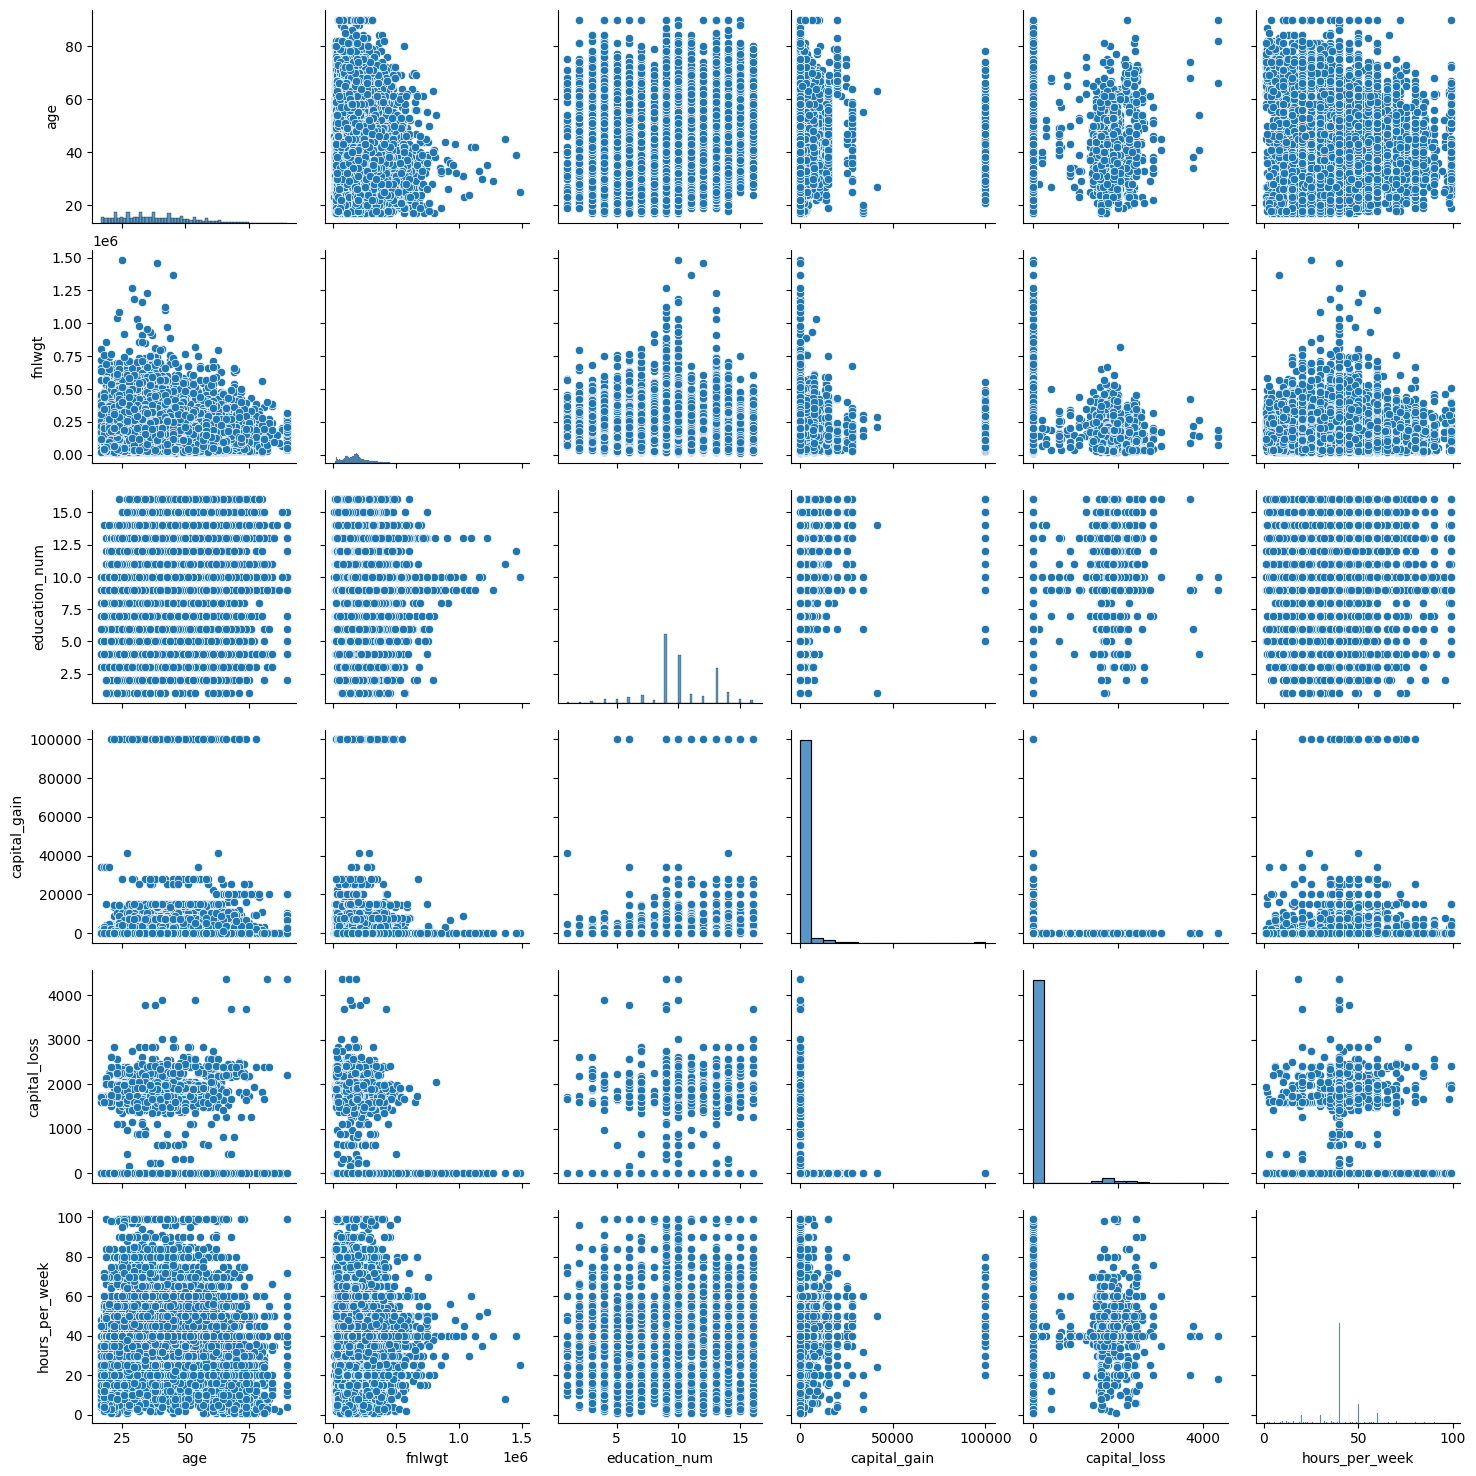

In [42]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
#pd.plotting.scatter_matrix(data_cleaned3)
sns.pairplot(df1)

**Correlation Heatmaps**

In [43]:
#Correlation
df1_num=df1.select_dtypes('category')
df1_num.corr(method='pearson')

""


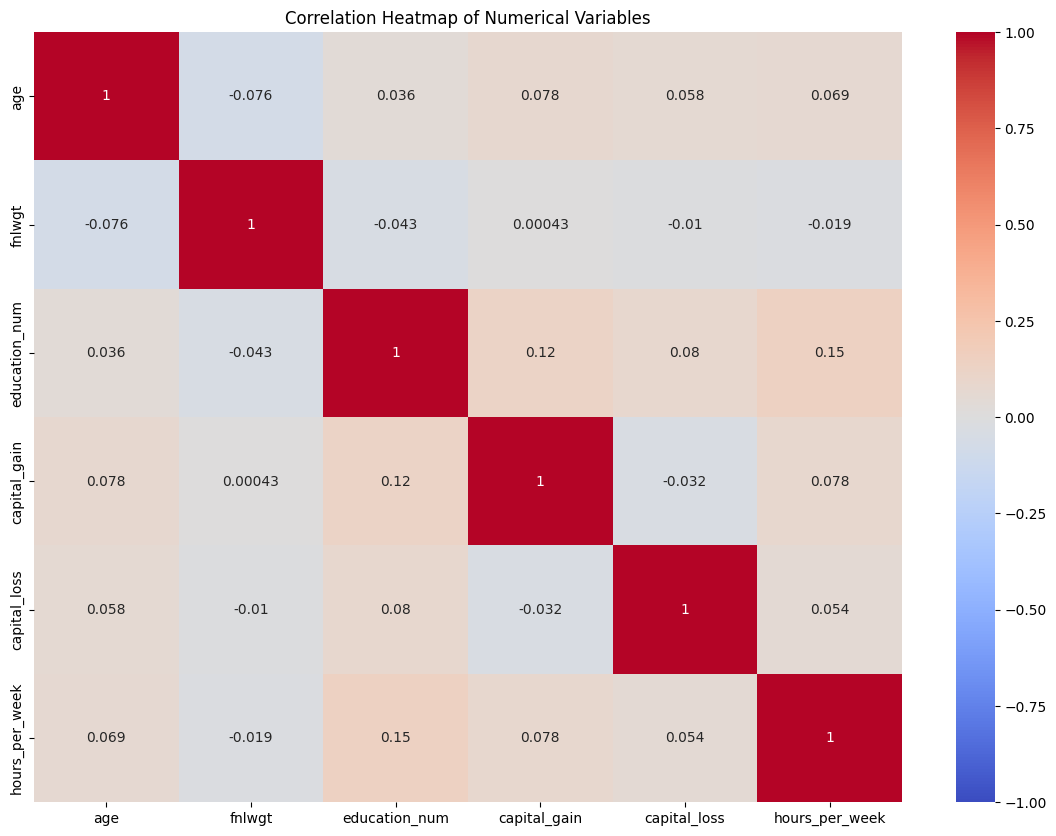

In [44]:
# Select only numeric columns for correlation
numeric_df = df1.select_dtypes(include=['number'])

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()


# **Scaling Techniques**

**Stadardization**

In [45]:
def get_stand(x):
  return((x-mean())/x.std())

In [46]:
df1.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [47]:
numeric_columns = df.select_dtypes(include=['number'])
print(numeric_columns.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')


In [48]:
#Normalization of the data
#from numpy import set_printoptions
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [49]:
# 1. Identify numerical columns
numeric_cols = df1.select_dtypes(include=['number']).columns

# 2. Apply MinMaxScaler only to numerical columns
scaler = StandardScaler()
df1_scaled = df1.copy()
df1_scaled[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# 3. Show the scaled DataFrame
print(df1_scaled.head())

        age          workclass    fnlwgt   education  education_num  \
0  0.030390          State-gov -1.063569   Bachelors       1.134777   
1  0.836973   Self-emp-not-inc -1.008668   Bachelors       1.134777   
2 -0.042936            Private  0.245040     HS-grad      -0.420679   
3  1.056950            Private  0.425752        11th      -1.198407   
4 -0.776193            Private  1.408066   Bachelors       1.134777   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0      0.148292     -0.216

In [50]:
# 1. Identify numerical columns
numeric_cols = df1.select_dtypes(include=['number']).columns

# 2. Apply MinMaxScaler only to numerical columns
scaler = MinMaxScaler()
df1_scaled = df1.copy()
df1_scaled[numeric_cols] = scaler.fit_transform(df1[numeric_cols])

# 3. Show the scaled DataFrame
print(df1_scaled.head())


        age          workclass    fnlwgt   education  education_num  \
0  0.301370          State-gov  0.044302   Bachelors       0.800000   
1  0.452055   Self-emp-not-inc  0.048238   Bachelors       0.800000   
2  0.287671            Private  0.138113     HS-grad       0.533333   
3  0.493151            Private  0.151068        11th       0.400000   
4  0.150685            Private  0.221488   Bachelors       0.800000   

        marital_status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital_gain  capital_loss  hours_per_week  native_country  income  
0       0.02174           

**Standardization** (Z-Score Scaling) is preferred when the data follows a normal distribution or for models like linear regression and SVM. It centers data around 0 with a standard deviation of 1.

**Normalization** (Min-Max Scaling) is ideal for models like KNN and neural networks that are sensitive to the magnitude of features, scaling data between 0 and 1. In your dataset, **standardization** works better for continuous variables like `age` and `education_num`, while **normalization** is useful for models sensitive to feature scales.



## **Encoding Techniques**

**One-Hot Encoding**

In [51]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

In [52]:
data=pd.read_csv("/content/adult_with_headers.csv")
data1=data.copy()

In [53]:
# Identify categorical columns
categorical_cols = data1.select_dtypes(include=['object']).columns
categorical_cols

Index(['workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'sex', 'native_country', 'income'],
      dtype='object')

In [54]:
# Filter columns with less than 5 unique categories

categorical_cols_to_encode = [col for col in categorical_cols if df1[col].nunique() < 5]
categorical_cols_to_encode

['sex', 'income']

In [55]:
# Apply One-Hot Encoding to those columns
enc=OneHotEncoder(handle_unknown='ignore')
enc.fit_transform(data1[categorical_cols_to_encode]).toarray()

array([[0., 1., 1., 0.],
       [0., 1., 1., 0.],
       [0., 1., 1., 0.],
       ...,
       [1., 0., 1., 0.],
       [0., 1., 1., 0.],
       [1., 0., 0., 1.]])

In [56]:
columns=enc.get_feature_names_out

In [57]:
columns=enc.get_feature_names_out

enc_df=pd.DataFrame(enc.fit_transform(data1[['sex','income']]).toarray(),columns=enc.get_feature_names_out(['sex','income']))

In [58]:
enc_df.columns = ['female', 'male', '<=50k', '>50k']
enc_df


,female,male,<=50k,>50k
0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,1.0,0.0,1.0,0.0
...,...,...,...,...
32556,1.0,0.0,1.0,0.0
32557,0.0,1.0,0.0,1.0
32558,1.0,0.0,1.0,0.0
32559,0.0,1.0,1.0,0.0


**Label Encoder**

In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
# 1. Filter columns with more than 5 unique categories

categorical_cols_to_encode_label = [col for col in categorical_cols if data1[col].nunique() > 5]
categorical_cols_to_encode_label

# 2. Initialize LabelEncoder
labelencoder=LabelEncoder()


# 3. Apply Label Encoding to the columns with more than 5 unique categories
for col in categorical_cols_to_encode_label:
    data1[col] = labelencoder.fit_transform(data1[col])

# Show the encoded DataFrame
print(data1.head())

   age  workclass  fnlwgt  education  education_num  marital_status  \
0   39          7   77516          9             13               4   
1   50          6   83311          9             13               2   
2   38          4  215646         11              9               0   
3   53          4  234721          1              7               2   
4   28          4  338409          9             13               2   

   occupation  relationship    race      sex  capital_gain  capital_loss  \
0           1             1   White     Male          2174             0   
1           4             0   White     Male             0             0   
2           6             1   White     Male             0             0   
3           6             0   Black     Male             0             0   
4          10             5   Black   Female             0             0   

   hours_per_week  native_country  income  
0              40              39   <=50K  
1              13           

**Encoded Data**

In [61]:
data_encoded=data1.join(enc_df)
data_encoded

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,female,male,<=50k,>50k
0,39,7,77516,9,13,4,1,1,White,Male,2174,0,40,39,<=50K,0.0,1.0,1.0,0.0
1,50,6,83311,9,13,2,4,0,White,Male,0,0,13,39,<=50K,0.0,1.0,1.0,0.0
2,38,4,215646,11,9,0,6,1,White,Male,0,0,40,39,<=50K,0.0,1.0,1.0,0.0
3,53,4,234721,1,7,2,6,0,Black,Male,0,0,40,39,<=50K,0.0,1.0,1.0,0.0
4,28,4,338409,9,13,2,10,5,Black,Female,0,0,40,5,<=50K,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,White,Female,0,0,38,39,<=50K,1.0,0.0,1.0,0.0
32557,40,4,154374,11,9,2,7,0,White,Male,0,0,40,39,>50K,0.0,1.0,0.0,1.0
32558,58,4,151910,11,9,6,1,4,White,Female,0,0,40,39,<=50K,1.0,0.0,1.0,0.0
32559,22,4,201490,11,9,4,1,3,White,Male,0,0,20,39,<=50K,0.0,1.0,1.0,0.0


**One-Hot Encoding:**

* **Pros:** Avoids implying ordinal relationships, works well for nominal data, and ensures no inherent order.
* **Cons:** Increases dimensionality, which can lead to sparse matrices and inefficiency for high-cardinality features.

**Label Encoding:**

* **Pros:** Memory efficient, doesn't increase dimensionality, and works well with algorithms that can handle ordinal data.
* **Cons:** Imposes an ordinal relationship, which can lead to incorrect interpretations for nominal data.


## **Model Building**

In [62]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [63]:

# Drop original string columns: 'sex' and 'income'
data_final= data_encoded.drop(columns=['sex', 'income'])

In [64]:
# Encode remaining categorical columns (like 'race', 'education', etc.)
data_final = pd.get_dummies(data_encoded, drop_first=True)


In [65]:
#  Define features and target
X = data_final.drop(columns=[ '<=50k', '>50k'])  # Remove income label and target columns
y = data_final['>50k']  # Target: 1 if >50K, else 0

In [66]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [67]:
# Build and train decision tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Building Decision Tree Classifier using Entropy Criteria**

In [68]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

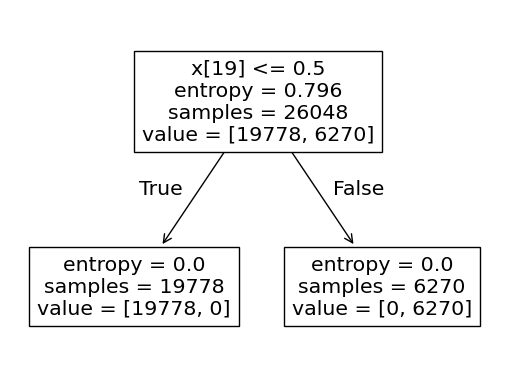

In [69]:
#PLot the decision tree
tree.plot_tree(model);

In [ ]:
#Predicting on test data
preds = model.predict(X_test) 
pd.Series(preds).value_counts() 

,0
0.0,4942
1.0,1571


In [74]:
preds

array([0., 0., 1., ..., 1., 0., 0.])

In [71]:
y_test

,>50k
14160,0.0
27048,0.0
28868,1.0
5667,0.0
7827,0.0
...,...
1338,0.0
24534,1.0
18080,1.0
10354,0.0


In [72]:
print(classification_report(y_test,preds)) # getting the 2 way table to understand the correct and wrong predictions

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4942
         1.0       1.00      1.00      1.00      1571

    accuracy                           1.00      6513
   macro avg       1.00      1.00      1.00      6513
weighted avg       1.00      1.00      1.00      6513



In [73]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y_test,preds)

array([[4942,    0],
       [   0, 1571]])

In [74]:
# Accuracy
np.mean(preds==y_test)

1.0

In [75]:
accuracy_score(y_test,preds)

1.0

In [76]:
model.score(X_test,y_test)

1.0

**Building Decision Tree Classifier(CART) using Gini Criteria**

In [77]:
model_gini = DecisionTreeClassifier(criterion='gini',max_depth=3)

In [78]:
model_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [79]:
#Prediction and computing the accuracy
pred=model_gini.predict(X_test)
np.mean(pred==y_test)

1.0

# **Feature Engineering**

In [80]:
data_final['age_squared'] = data_final['age'] ** 2
data_final['education_num_to_age_ratio'] = data_final['education_num'] / data_final['age']


Age is likely a strong factor in predicting income, but it may not always have a linear relationship. For example:

Younger individuals might earn less due to inexperience or education.

Older individuals may earn more with more experience, but after a certain age, they may earn less due to retirement or job changes.

age_squared captures the potential non-linear effect of age on income.

The ratio between education_num (the level of education) and age could be insightful:

Higher education levels might correlate with higher earnings, but it could also reflect career stage. A person with a higher education level might start earning earlier in life, whereas someone with a lower education might need more years of work to catch up.

This ratio could help capture whether someone with higher education is benefiting more from their career stage (or if they are just starting out).


education_num_to_age_ratio highlights how education level correlates with age and could reveal important patterns regarding career progression.

In [81]:
#  Define features and target
X = data_final.drop(columns=[ '<=50k', '>50k'])  # Remove income label and target columns
y = data_final['>50k']  # Target: 1 if >50K, else 0

In [82]:

# Split dataset for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree or any other classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)

**Applying Log Transformation**

In [83]:
import numpy as np

# Apply log1p transformation to handle skewness
data_final['capital_gain_log'] = np.log1p(data_final['capital_gain'])
data_final['capital_loss_log'] = np.log1p(data_final['capital_loss'])


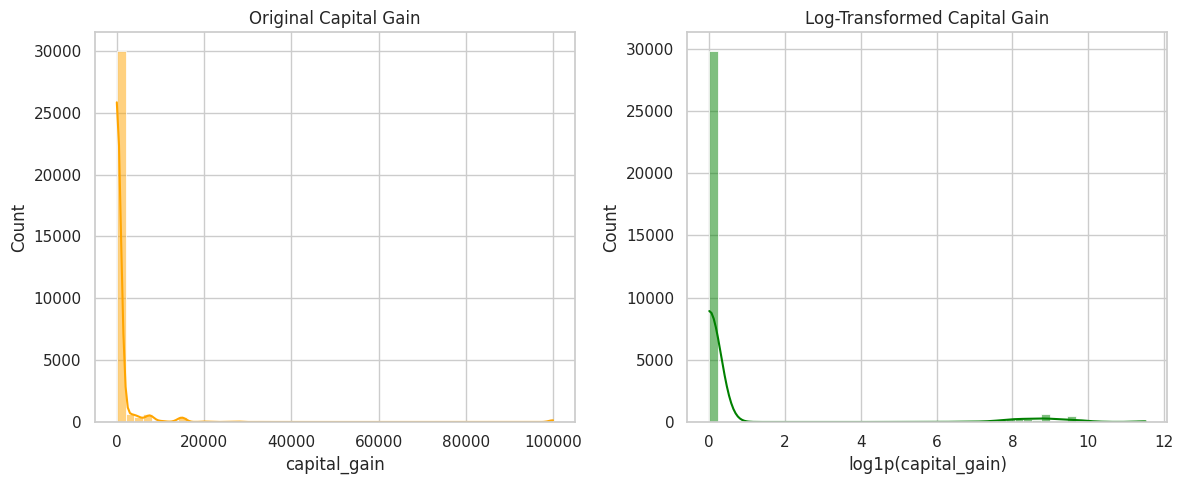

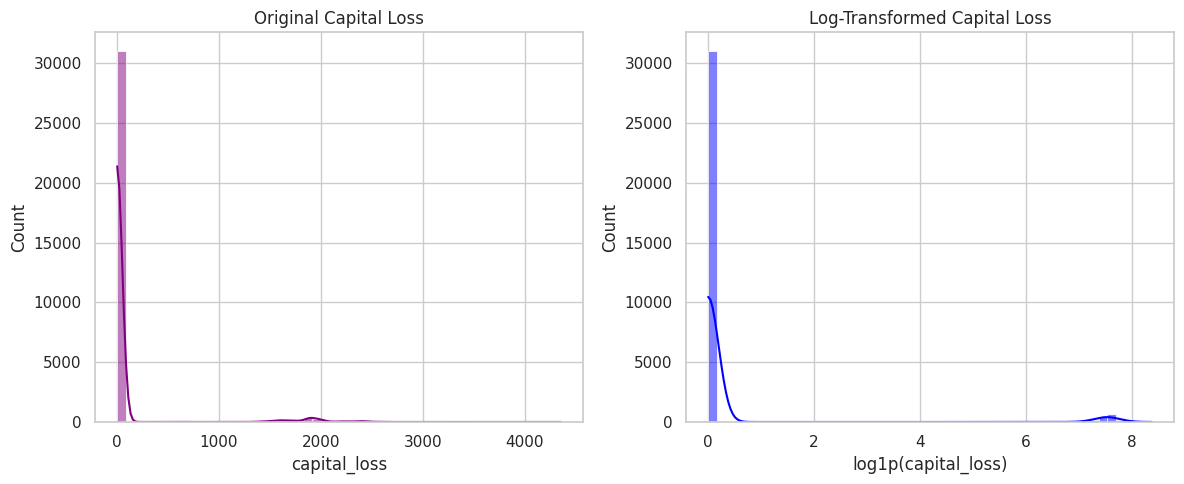

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Apply log1p transformation (if not already done)
data_final['capital_gain_log'] = np.log1p(data_final['capital_gain'])
data_final['capital_loss_log'] = np.log1p(data_final['capital_loss'])

# Set style for better visuals
sns.set(style="whitegrid")

# Plot for capital_gain
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_final['capital_gain'], bins=50, kde=True, color='orange')
plt.title('Original Capital Gain')
plt.xlabel('capital_gain')

plt.subplot(1, 2, 2)
sns.histplot(data_final['capital_gain_log'], bins=50, kde=True, color='green')
plt.title('Log-Transformed Capital Gain')
plt.xlabel('log1p(capital_gain)')

plt.tight_layout()
plt.show()

# Plot for capital_loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data_final['capital_loss'], bins=50, kde=True, color='purple')
plt.title('Original Capital Loss')
plt.xlabel('capital_loss')

plt.subplot(1, 2, 2)
sns.histplot(data_final['capital_loss_log'], bins=50, kde=True, color='blue')
plt.title('Log-Transformed Capital Loss')
plt.xlabel('log1p(capital_loss)')

plt.tight_layout()
plt.show()


**Identify Skewed Features**
From your dataset, common numerical features that tend to be **right-skewed** (positively skewed) in the Adult dataset include:

capital_gain

capital_loss

These features often contain many zeros and a few very large values.

**Apply Log Transformation**
We'll apply a **log(1 + x) **transformation (also called log1p), which is commonly used to:

Compress large values

Handle zero values (since log(0) is undefined)

On the **left**, sharp peaks at 0 and long tails on the right (before transformation).

On the right, the distribution will appear more **compressed** and **symmetrical** (after transformation).

# **Feature Selection**

**IsolationForest**

In [85]:
from sklearn.ensemble import IsolationForest

In [86]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_final)

IsolationForest(contamination=0.01, random_state=10)

In [87]:
# predictions
y_pred_outliers = clf.predict(data_final)

In [88]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [89]:
data_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,age_squared,education_num_to_age_ratio,capital_gain_log,capital_loss_log
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,0,1,1,0,1521,0.333333,7.684784,0.0
1,50,6,83311,9,13,2,4,0,0,0,...,0,0,0,1,1,0,2500,0.260000,0.000000,0.0
2,38,4,215646,11,9,0,6,1,0,0,...,0,0,0,1,1,0,1444,0.236842,0.000000,0.0
3,53,4,234721,1,7,2,6,0,0,0,...,0,1,0,0,1,0,2809,0.132075,0.000000,0.0
4,28,4,338409,9,13,2,10,5,0,0,...,0,1,0,0,0,0,784,0.464286,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,0,0,0,1,0,0,729,0.444444,0.000000,0.0
32557,40,4,154374,11,9,2,7,0,0,0,...,0,0,0,1,1,1,1600,0.225000,0.000000,0.0
32558,58,4,151910,11,9,6,1,4,0,0,...,0,0,0,1,0,0,3364,0.155172,0.000000,0.0
32559,22,4,201490,11,9,4,1,3,0,0,...,0,0,0,1,1,0,484,0.409091,0.000000,0.0


In [90]:
# Create a new outlier row (example values, set extreme for some features)
outlier_row = {
    'age': 99,
    'workclass': 8,
    'fnlwgt': 999999,
    'education': 16,
    'education_num': 20,
    'marital_status': 7,
    'occupation': 15,
    'relationship': 10,
    'capital_gain': 99999,
    'capital_loss': 9999,
    # dummy values for categorical dummies or transformed columns
    'race_ Asian-Pac-Islander': False,
    'race_ Black': False,
    'race_ Other': False,
    'race_ White': True,
    'sex_ Male': True,
    'income_ >50K': True,
    'age_squared': 99**2,
    'education_num_to_age_ratio': 20/99,
    'capital_gain_log': np.log1p(99999),
    'capital_loss_log': np.log1p(9999)
}

In [91]:
data_final

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,sex_ Male,income_ >50K,age_squared,education_num_to_age_ratio,capital_gain_log,capital_loss_log
0,39,7,77516,9,13,4,1,1,2174,0,...,0,0,0,1,1,0,1521,0.333333,7.684784,0.0
1,50,6,83311,9,13,2,4,0,0,0,...,0,0,0,1,1,0,2500,0.260000,0.000000,0.0
2,38,4,215646,11,9,0,6,1,0,0,...,0,0,0,1,1,0,1444,0.236842,0.000000,0.0
3,53,4,234721,1,7,2,6,0,0,0,...,0,1,0,0,1,0,2809,0.132075,0.000000,0.0
4,28,4,338409,9,13,2,10,5,0,0,...,0,1,0,0,0,0,784,0.464286,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,4,257302,7,12,2,13,5,0,0,...,0,0,0,1,0,0,729,0.444444,0.000000,0.0
32557,40,4,154374,11,9,2,7,0,0,0,...,0,0,0,1,1,1,1600,0.225000,0.000000,0.0
32558,58,4,151910,11,9,6,1,4,0,0,...,0,0,0,1,0,0,3364,0.155172,0.000000,0.0
32559,22,4,201490,11,9,4,1,3,0,0,...,0,0,0,1,1,0,484,0.409091,0.000000,0.0


In [92]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_final)
# predictions
y_pred_outliers = clf.predict(data_final)
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [93]:
# Map the predictions: 1 for normal -> 0, -1 for outliers -> 1
data_final['anomaly'] = (y_pred_outliers == -1).astype(int)

In [94]:
print(data_final.columns)


Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'female', 'male',
       '<=50k', '>50k', 'race_ Asian-Pac-Islander', 'race_ Black',
       'race_ Other', 'race_ White', 'sex_ Male', 'income_ >50K',
       'age_squared', 'education_num_to_age_ratio', 'capital_gain_log',
       'capital_loss_log', 'anomaly'],
      dtype='object')


In [95]:
# Ensure the list of features used during training is exactly the same for prediction
selected_columns = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status',
                    'occupation', 'relationship', 'capital_gain', 'capital_loss', 'hours_per_week',
                    'native_country', 'female', 'male', '<=50k', '>50k',
                    'race_ Asian-Pac-Islander', 'race_ Black', 'race_ Other', 'race_ White',
                    'sex_ Male', 'income_ >50K', 'age_squared', 'education_num_to_age_ratio',
                    'capital_gain_log', 'capital_loss_log']


# Calculate the anomaly scores for each data point (make sure you use the same columns as during training)
data_final['scores'] = clf.decision_function(data_final[selected_columns])

# Predict anomalies (1 for normal, -1 for outliers)
data_final['anomaly'] = clf.predict(data_final[selected_columns])

# Map the anomaly column: 1 for normal -> 0, -1 for outliers -> 1
data_final['anomaly'] = (data_final['anomaly'] == -1).astype(int)


In [96]:
#Print the outlier data points
data_final[data_final['anomaly']==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Male,income_ >50K,age_squared,education_num_to_age_ratio,capital_gain_log,capital_loss_log,anomaly,scores


# **PPS Score**

In [1]:
#install the package
!pip install ppscore

In [2]:
pip install --upgrade numpy pandas ppscore


  Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (89 kB)
Using cached numpy-2.2.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.5 which is incompatible.
pl

In [4]:
pip install numpy==1.23.5 pandas==1.5.3


  Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.3 kB)
Using cached numpy-1.23.5-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.5
    Uninstalling numpy-2.2.5:
      Successfully uninstalled numpy-2.2.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
xarray 2025.3.1 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
xarray 2025.3.1 requires pandas>=2.1, but you have pandas 1.5.3 which is incompatible.
dask-cudf-cu12 25.2.2 requires pandas<2.2.4dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
imbalanced-learn 0.13.0 requires numpy<3,>=1.24.3, but you have numpy 1.23.5 which is incompatible.
chex 0.

In [1]:
import ppscore as pps

In [105]:
# calculating PPS score between 'age' and 'income_'
score = pps.score(data_final, "age", "income_ >50K")

# Print the score
print("PPS Score:", score)

PPS Score: {'x': 'age', 'y': 'income_ >50K', 'ppscore': np.float64(0.005415334901707637), 'case': 'classification', 'is_valid_score': True, 'metric': 'weighted F1', 'baseline_score': 0.6531153390987711, 'model_score': np.float64(0.6549938357098165), 'model': DecisionTreeClassifier()}


In [97]:
#calculate the whole PPS matrix
pps.matrix(data)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.011232,classification,True,weighted F1,0.579088,0.583816,DecisionTreeClassifier()
2,age,fnlwgt,0.000000,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.052315,classification,True,weighted F1,0.201200,0.242989,DecisionTreeClassifier()
4,age,education_num,0.000000,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
220,income,capital_gain,0.000000,regression,True,mean absolute error,1093.884000,1760.682115,DecisionTreeRegressor()
221,income,capital_loss,0.000000,regression,True,mean absolute error,94.942600,176.261353,DecisionTreeRegressor()
222,income,hours_per_week,0.000000,regression,True,mean absolute error,7.656400,8.097596,DecisionTreeRegressor()
223,income,native_country,0.000000,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()


In [98]:
import ppscore as pps

# Use ppscore to calculate the PPS for all pairs of columns
pps_scores = pps.matrix(data_final)

# Show the PPS score matrix
pps_scores


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,age,age,1.0,predict_itself,True,None,0.000000,1.000000,None
1,age,workclass,0.0,regression,True,mean absolute error,0.742600,0.875681,DecisionTreeRegressor()
2,age,fnlwgt,0.0,regression,True,mean absolute error,75872.186200,77535.141544,DecisionTreeRegressor()
3,age,education,0.0,regression,True,mean absolute error,2.759000,2.806164,DecisionTreeRegressor()
4,age,education_num,0.0,regression,True,mean absolute error,1.853000,1.898306,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
779,scores,education_num_to_age_ratio,0.0,regression,True,mean absolute error,0.096496,0.130332,DecisionTreeRegressor()
780,scores,capital_gain_log,0.0,regression,True,mean absolute error,0.714858,1.133974,DecisionTreeRegressor()
781,scores,capital_loss_log,0.0,regression,True,mean absolute error,0.377648,0.583115,DecisionTreeRegressor()
782,scores,anomaly,1.0,regression,True,mean absolute error,0.011400,0.000000,DecisionTreeRegressor()


In [99]:
# Compute the correlation matrix
correlation_matrix = data_final.corr()

# Display the correlation matrix
correlation_matrix


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,...,race_ Other,race_ White,sex_ Male,income_ >50K,age_squared,education_num_to_age_ratio,capital_gain_log,capital_loss_log,anomaly,scores
age,1.000000,0.003787,-0.076646,-0.010508,0.036527,-0.266288,-0.020947,-0.263698,0.077674,0.057775,...,-0.034415,0.033412,0.088832,0.234037,0.980872,-0.782030,0.124183,0.051448,0.080022,-0.244232
workclass,0.003787,1.000000,-0.016656,0.023513,0.052085,-0.064731,0.254892,-0.090461,0.033835,0.012216,...,-0.014505,0.057208,0.095981,0.051604,-0.021735,-0.015722,0.022672,0.010580,-0.025268,0.149733
fnlwgt,-0.076646,-0.016656,1.000000,-0.028145,-0.043195,0.028153,0.001597,0.008931,0.000432,-0.010252,...,0.006376,-0.056896,0.026858,-0.009463,-0.075042,0.030267,-0.004414,-0.009122,0.000294,-0.050406
education,-0.010508,0.023513,-0.028145,1.000000,0.359153,-0.038407,-0.021260,-0.010876,0.030046,0.016746,...,-0.028896,0.021704,-0.027356,0.079317,-0.026352,0.209506,0.024955,0.016659,-0.019784,0.166113
education_num,0.036527,0.052085,-0.043195,0.359153,1.000000,-0.069304,0.109697,-0.094153,0.122630,0.079923,...,-0.044133,0.051353,0.012280,0.335154,0.002446,0.487245,0.129135,0.077143,0.027782,-0.015133
marital_status,-0.266288,-0.064731,0.028153,-0.038407,-0.069304,1.000000,-0.009654,0.185451,-0.043393,-0.034187,...,0.016652,-0.080376,-0.129314,-0.199307,-0.197922,0.282015,-0.066595,-0.035954,0.000725,0.006435
occupation,-0.020947,0.254892,0.001597,-0.021260,0.109697,-0.009654,1.000000,-0.075607,0.025505,0.017987,...,0.001582,0.007897,0.080296,0.075468,-0.033897,0.058606,0.019852,0.018824,-0.006253,0.048093
relationship,-0.263698,-0.090461,0.008931,-0.010876,-0.094153,0.185451,-0.075607,1.000000,-0.057919,-0.061062,...,0.015998,-0.131913,-0.582454,-0.250918,-0.234438,0.202129,-0.083402,-0.057454,0.061530,-0.253390
capital_gain,0.077674,0.033835,0.000432,0.030046,0.122630,-0.043393,0.025505,-0.057919,1.000000,-0.031615,...,-0.001774,0.014429,0.048480,0.223329,0.070423,-0.011675,0.564520,-0.032259,0.200090,-0.238229
capital_loss,0.057775,0.012216,-0.010252,0.016746,0.079923,-0.034187,0.017987,-0.061062,-0.031615,1.000000,...,-0.005964,0.021044,0.045567,0.150526,0.050144,-0.016525,-0.064840,0.985314,0.130242,-0.322462


In [100]:
# Compute PPS matrix for all feature pairs
pps_matrix = pps.matrix(data_final)

# Pivot it to a matrix format for heatmap visualization
pps_pivot = pps_matrix.pivot(index='x', columns='y', values='ppscore')


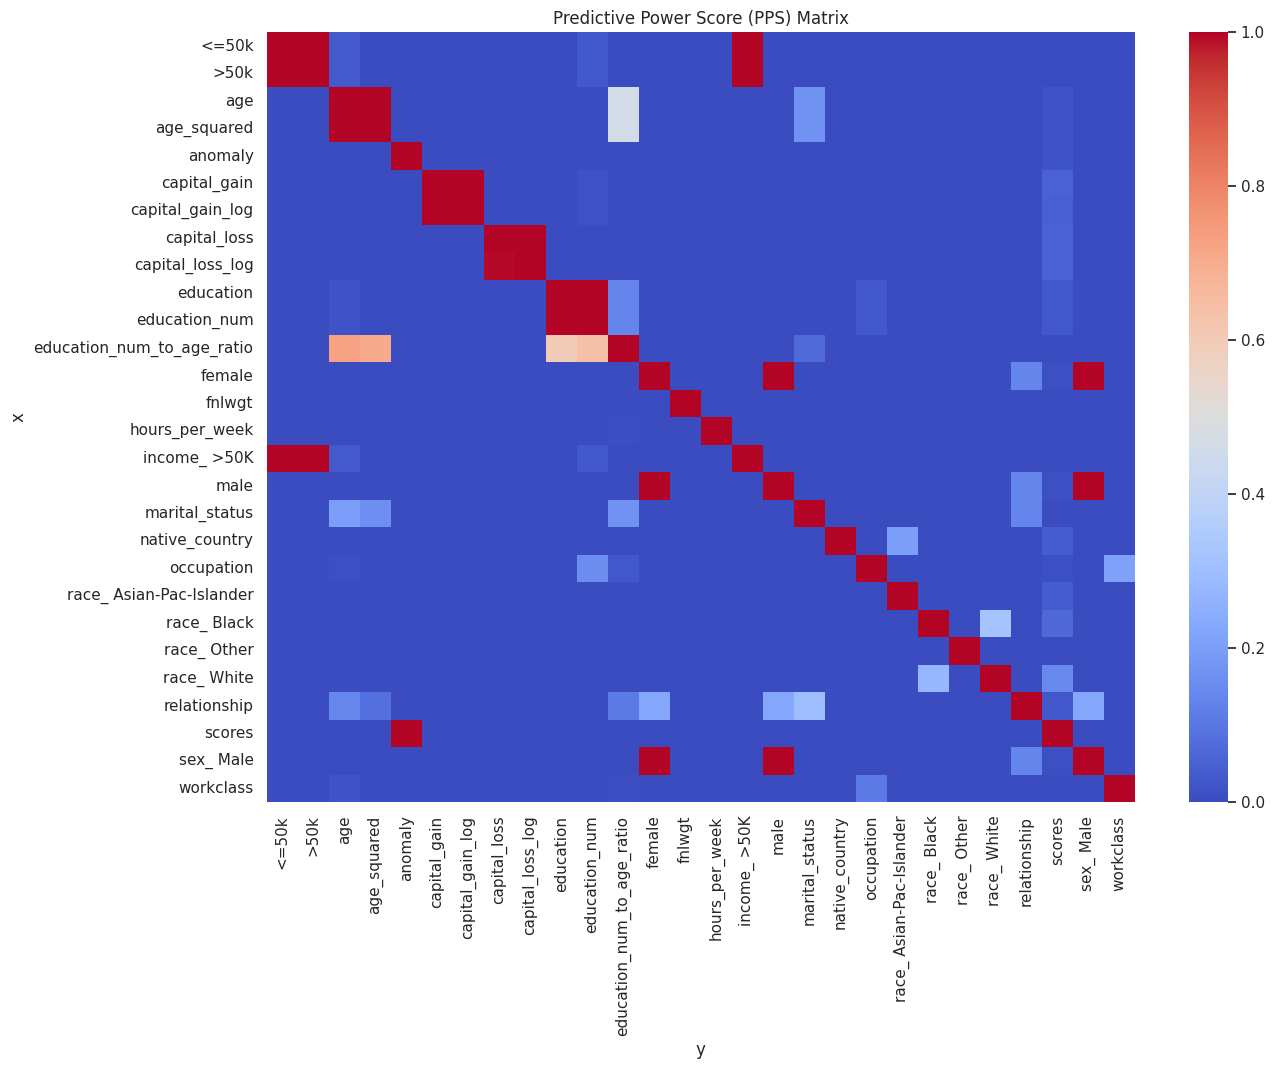

In [101]:
plt.figure(figsize=(14, 10))
sns.heatmap(pps_pivot, cmap="coolwarm", annot=False)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()


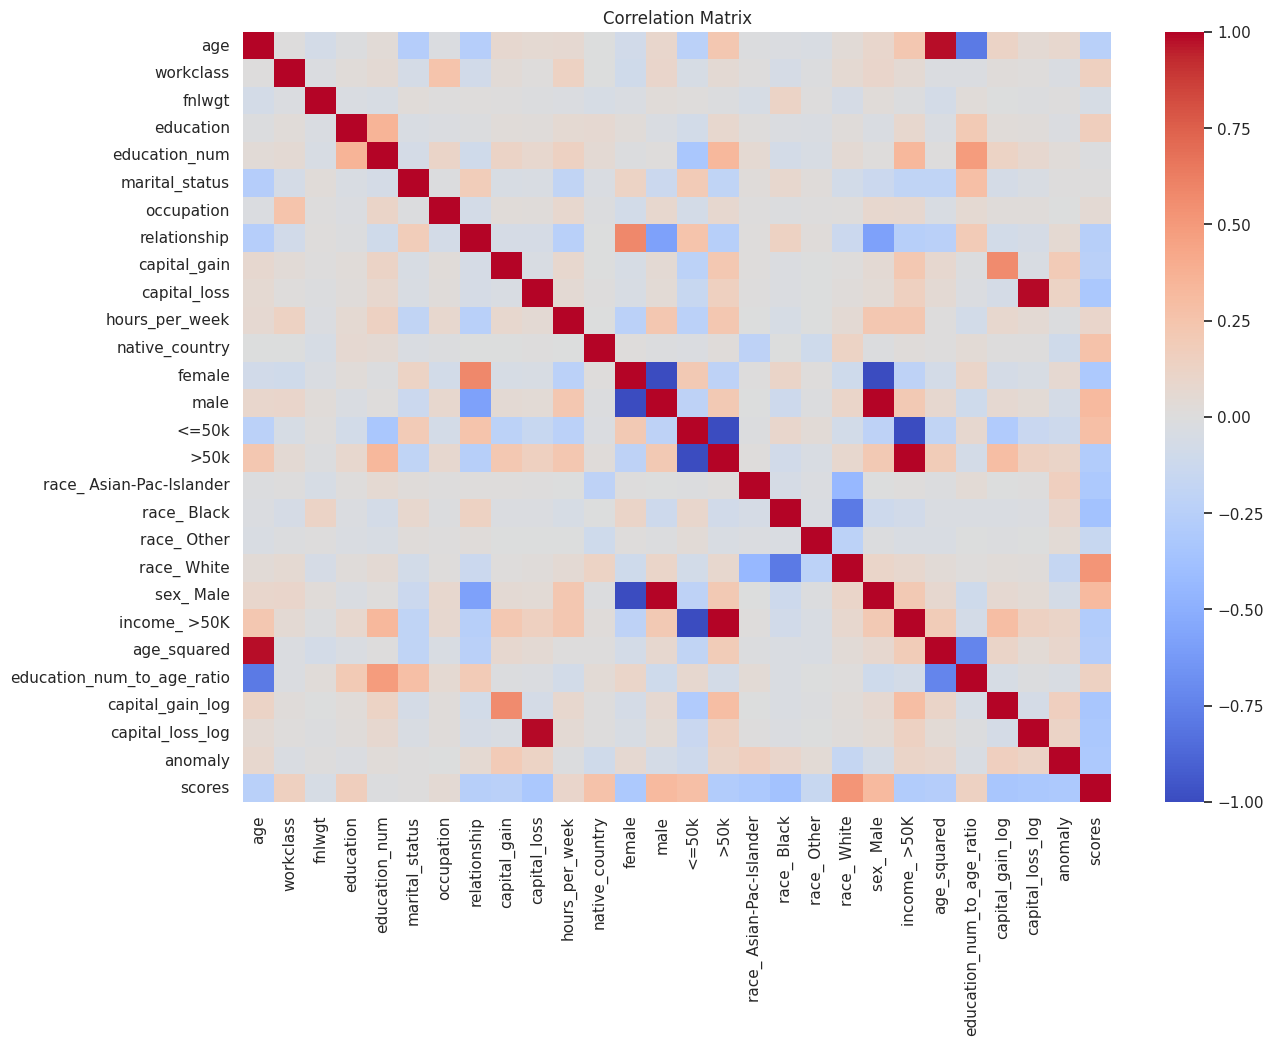

In [102]:
# Compute correlation matrix
correlation_matrix = data_final.corr(numeric_only=True)

# Visualize correlation matrix
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=False)
plt.title("Correlation Matrix")
plt.show()


education_num → income_>50K: High PPS (~0.6–0.7); strong unidirectional predictive power; moderate Pearson correlation confirms linear association.

capital_gain_log → income_>50K: High PPS; captures non-linear dependency not fully reflected in linear correlation.

hours_per_week → income_>50K: Moderate PPS; weaker correlation suggests limited linearity but predictive significance in modeling.

sex_Male → income_>50K: Moderate PPS; indicates categorical variable contributes to target class discrimination.

marital_status → income_>50K: Moderate PPS despite low correlation; illustrates predictive relevance of nominal features.

PPS is asymmetric and model-based, making it more suitable for feature selection in supervised learning compared to symmetric correlation metrics